## Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data=pd.read_feather(r'C:\Users\mery_\Desktop\New folder\Appendix3_Materials\Video_Lectures_NBs/Sales_data.ftr')

In [3]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Removing Null Values from the Dataset

In [4]:
data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.rename(columns={'Order Date':'Date'}, inplace=True)

## Developing a Month Splitting Function for Data Processing

In [7]:
data['Month']=data['Date'].str.split('/').str.get(0)
data

,Order ID,Product,Quantity Ordered,Price Each,Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [8]:
data.Month.unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

## Filtering the 'Month' Column: Retaining Only Month Values as Numerical Representation

In [9]:
filter1=data.Month=='Order Date'

In [11]:
data=data[~filter1]
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


## Converting Data Types: Transforming Selected Columns to Integers and Floats

In [12]:
data['Month']=data['Month'].astype(int)

In [13]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Date                object
Purchase Address    object
Month                int32
dtype: object

In [14]:
data['Quantity Ordered']=data['Quantity Ordered'].astype(int)
data['Price Each']=data['Price Each'].astype(float)

## Generating Monthly Sales Data

In [15]:
data['sales']=data['Quantity Ordered']*data['Price Each']

Text(0.5, 1.0, 'Monthly sales')

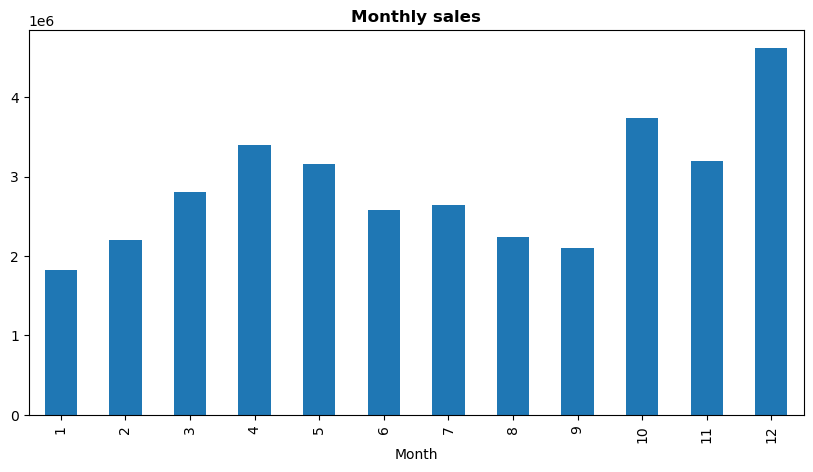

In [37]:
data.groupby(['Month'])['sales'].sum().plot(kind='bar', figsize=(10,5))
plt.title('Monthly sales', fontweight='bold')

In [17]:
data['city']=data['Purchase Address'].str.split(',').str.get(1)

In [18]:
data.groupby(['city'])['sales']

## Calculating Total Sales by City

Text(0.5, 1.0, 'Total sales of each city')

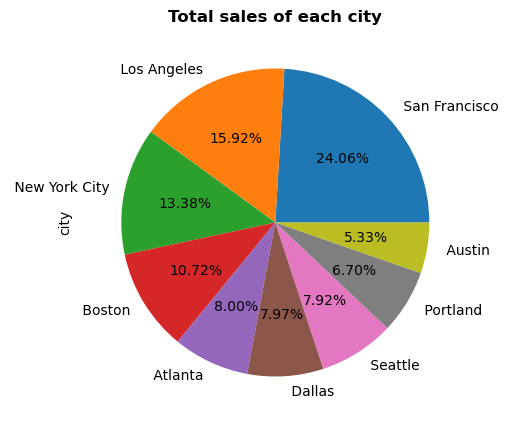

In [34]:
data.city.value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(10,5))
plt.title('Total sales of each city', fontweight='bold')

## Product Analysis: Aggregating Total Quantity Ordered and Calculating Mean Price for Each Product

In [20]:
product=data.groupby(['Product']).agg({'Quantity Ordered':'sum','Price Each':'mean'})

In [21]:
product.reset_index(inplace=True)

In [22]:
product

,Product,Quantity Ordered,Price Each
0,20in Monitor,4129,109.99
1,27in 4K Gaming Monitor,6244,389.99
2,27in FHD Monitor,7550,149.99
3,34in Ultrawide Monitor,6199,379.99
4,AA Batteries (4-pack),27635,3.84
5,AAA Batteries (4-pack),31017,2.99
6,Apple Airpods Headphones,15661,150.00
7,Bose SoundSport Headphones,13457,99.99
8,Flatscreen TV,4819,300.00
9,Google Phone,5532,600.00


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

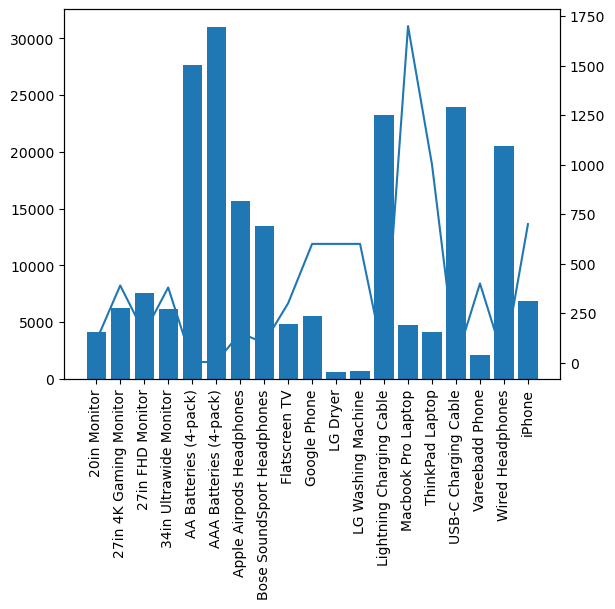

In [33]:
fig,ax1=plt.subplots()

ax2=ax1.twinx()

ax1.bar(product['Product'],product['Quantity Ordered'])
ax2.plot(product['Product'], product['Price Each'])
ax1.set_xticklabels(product['Product'],rotation='vertical')

## Identifying the Top 5 Best-Selling Products of the Year

In [26]:
most_sold=data.Product.value_counts()[:5].index

In [27]:
new_data=data[data['Product'].isin(most_sold)]

In [28]:
new_data

,Order ID,Product,Quantity Ordered,Price Each,Date,Purchase Address,Month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta
...,...,...,...,...,...,...,...,...,...
186840,259349,AAA Batteries (4-pack),1,2.99,09/01/19 22:14,"911 River St, Dallas, TX 75001",9,2.99,Dallas
186842,259350,USB-C Charging Cable,1,11.95,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,11.95,San Francisco
186844,259352,USB-C Charging Cable,1,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016",9,11.95,San Francisco
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles


In [29]:
pivot=pd.crosstab(new_data['Month'],new_data['Product'])

<AxesSubplot:xlabel='Month'>

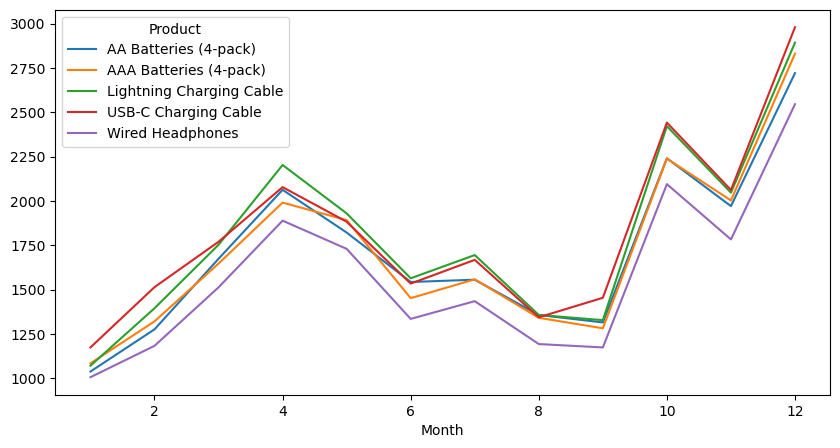

In [31]:
pivot.plot(kind='line', figsize=(10,5))